In [595]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, silhouette_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
sns.set_style('white')

In [596]:
mpl.rcParams['figure.figsize'] = 8, 8
mpl.rcParams['axes.grid'] = False
mpl.rcParams['axes.edgecolor'] = '0.3'
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['axes.labelcolor'] = '0.3'
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['axes.titlesize'] = 24
mpl.rcParams['patch.edgecolor'] = 'none'
mpl.rcParams['xtick.major.size'] = 0
mpl.rcParams['ytick.major.size'] = 0
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18
mpl.rcParams['xtick.color'] = '0.3'
mpl.rcParams['ytick.color'] = '0.3'
mpl.rcParams['text.color'] = '0.3'

In [597]:
def plot_supervised_model(name, model, X_test, y_test, y_pred):
    cmap_light = ListedColormap(['#d5deb3', '#a3d1db', '#f5b8b8', '#ffc8a3', '#b792ba', '#aabad1', '#b2d7ca', '#ffe192'])
    cmap_bold = ListedColormap(['#8ba52c', '#00819b', '#e43939'])
    plt.figure(figsize=(8, 8))
#    ax = plt.gca()
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=100, cmap=cmap_bold)
#    ax.legend(y_test, labels, loc=4)
    idx = np.where(y_pred != y_test)
    plt.scatter(X_test[idx, 0], X_test[idx, 1], c=y_pred[idx], s=300, alpha=0.2, cmap=cmap_bold)
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.title(name)
    plt.show()

In [598]:
def plot_unsupervised_model(name, model, X):
    cmap_light = ListedColormap(['#d5deb3', '#a3d1db', '#f5b8b8', '#ffc8a3', '#b792ba', '#aabad1', '#b2d7ca', '#ffe192'])
    cmap_bold = ListedColormap(['#8ba52c', '#00819b', '#e43939'])
    h = .02
    X_sub = X[:, :2]
    model.fit(X_sub, y)
    centroids = model.cluster_centers_
    x_min, x_max = X_sub[:, 0].min() - 1, X_sub[:, 0].max() + 1
    y_min, y_max = X_sub[:, 1].min() - 1, X_sub[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 8))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X_sub[:, 0], X_sub[:, 1], s=50, cmap=cmap_bold)
    plt.scatter(centroids[:, 0], centroids[:, 1], 
                marker='x', s=300, linewidths=5,
                color='w', zorder=10)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(name)
    plt.xlabel('Sepal Length', fontsize=20)
    plt.ylabel('Sepal Width', fontsize=20)
    plt.show()

# Plotting the data

/Users/marijavlajic/anaconda/envs/py3k/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


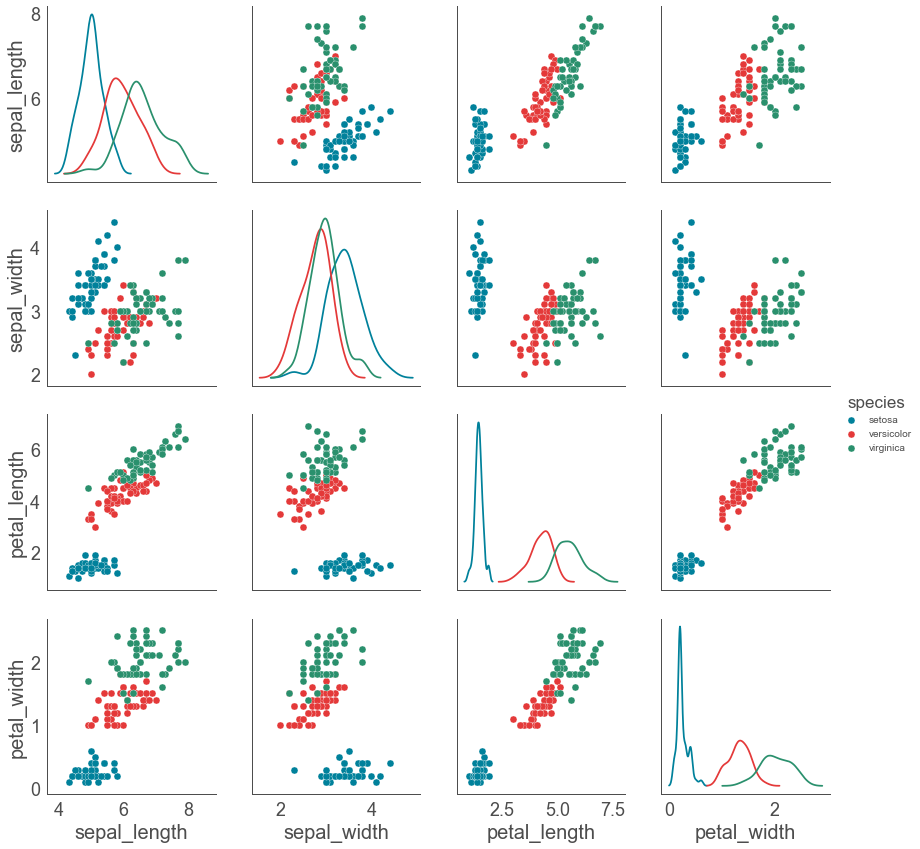

In [599]:
iris = sns.load_dataset('iris')
sns.pairplot(iris, hue='species', size=3, diag_kind="kde")

# Loading and preparing the data

In [600]:
iris_dataset = load_iris()

Separate features and labels

In [601]:
X = iris_dataset.data
y = iris_dataset.target

X is a vector of features (_sepal_ and _petal_ _width_ and _length_), y is a vector of labels (_setosa_, _versicolor_, _virginica_)

In [602]:
iris_dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [603]:
iris_dataset.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [604]:
labels = iris_dataset.target_names

Separate the dataset into a training and test set

In [605]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [606]:
X.shape, y.shape

((150, 4), (150,))

In [607]:
X_train.shape, y_train.shape

((90, 4), (90,))

In [608]:
X_test.shape, y_test.shape

((60, 4), (60,))

### Logistic Regression

In [609]:
model = LogisticRegression()

Take only first two dimensions as features (sepal length and width) and separate into training and test datasets with 60/40 split

In [610]:
X_sub = X[:, :2]
X_train, X_test, y_train, y_test = train_test_split(X_sub, y, test_size=0.4, random_state=42)

Train the model and predict the labels for the test set

In [611]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

What is the accuracy of this model?

In [612]:
accuracy_score(y_test, y_pred)

0.71666666666666667

Look up some other accuracy measures and what they mean and calculate them (link to documentation)

In [613]:
#^ this

E.g. confusion matrix (add the plotting feature)

In [614]:
confusion_matrix(y_test, y_pred) 

array([[23,  0,  0],
       [ 1,  2, 16],
       [ 0,  0, 18]])

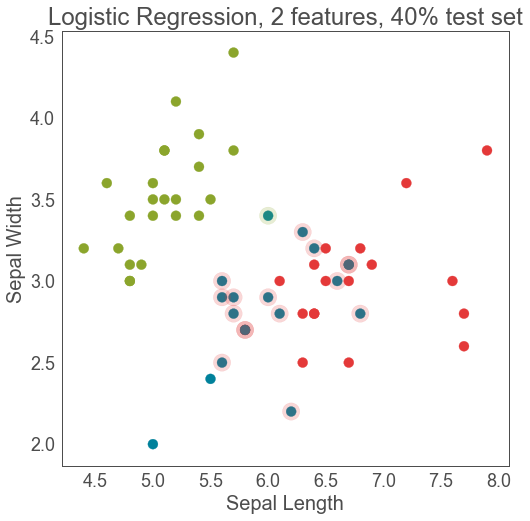

In [615]:
plot_supervised_model('Logistic Regression, 2 features, 40% test set', model, X_test, y_test, y_pred)

Increase the size of the training set to e.g. 80/20 (leave empty for people to do?)

In [616]:
X_sub = X[:, :2]
X_train, X_test, y_train, y_test = train_test_split(X_sub, y, test_size=0.2, random_state=42)

Train the model and predict the labels for this new model (leave empty for people to do?)

In [617]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

What is the accuracy of this new model?

In [618]:
accuracy_score(y_test, y_pred)

0.83333333333333337

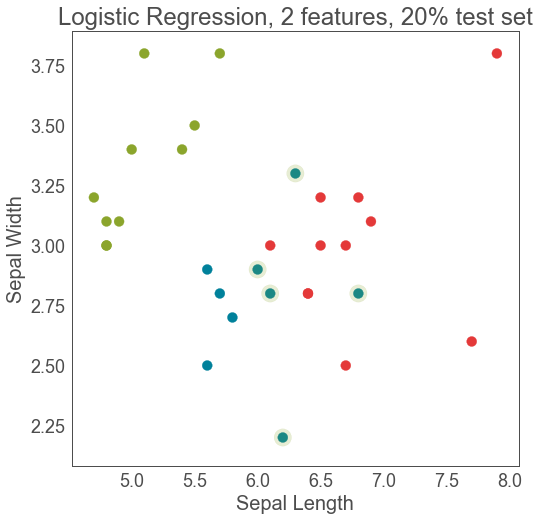

In [619]:
plot_supervised_model('Logistic Regression, 2 features, 20% test set', model, X_test, y_test, y_pred)

Add another feature

In [620]:
X_sub = X[:, :3]
X_train, X_test, y_train, y_test = train_test_split(X_sub, y, test_size=0.2, random_state=42)

In [621]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [622]:
accuracy_score(y_test, y_pred)

0.90000000000000002

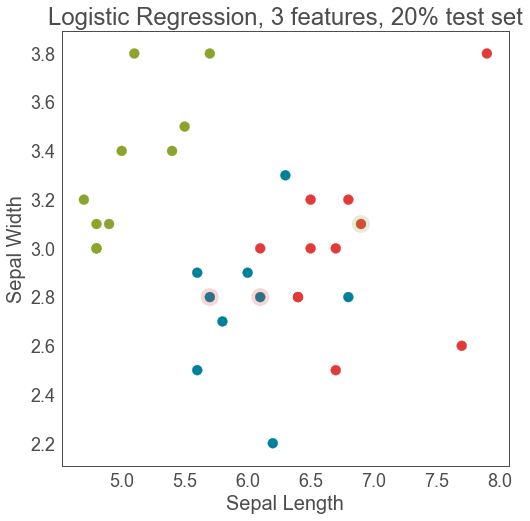

In [623]:
plot_supervised_model('Logistic Regression, 3 features, 20% test set', model, X_test, y_test, y_pred)

As an exercise, now use all 4 features

In [624]:
X_sub = X
X_train, X_test, y_train, y_test = train_test_split(X_sub, y, test_size=0.2, random_state=42)

In [625]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [626]:
accuracy_score(y_test, y_pred)

1.0

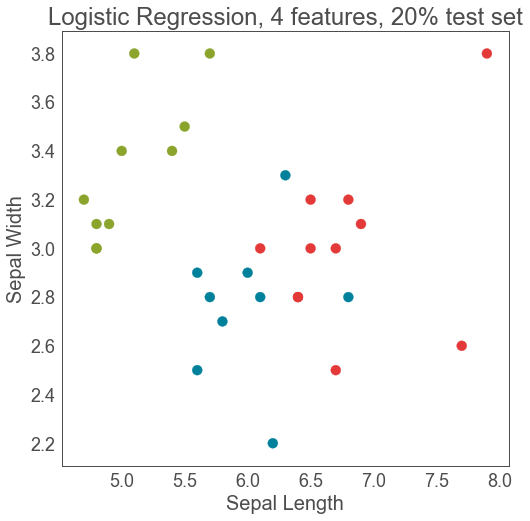

In [627]:
plot_supervised_model('Logistic Regression, 4 features, 20% test set', model, X_test, y_test, y_pred)

### Support Vector Machines

In [628]:
model = SVC()

In [629]:
X_sub = X[:, :2]
X_train, X_test, y_train, y_test = train_test_split(X_sub, y, test_size=0.2, random_state=42)

In [630]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [631]:
accuracy_score(y_test, y_pred)

0.90000000000000002

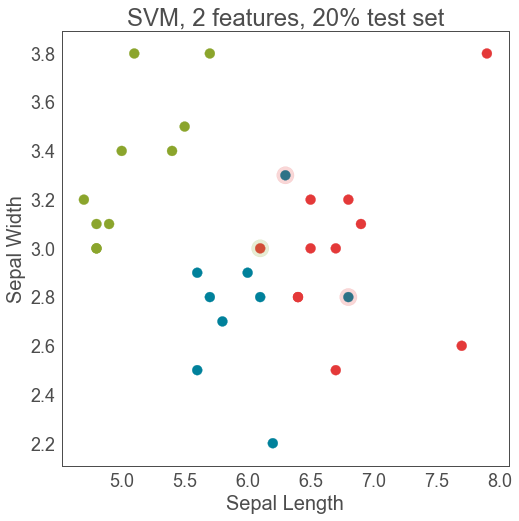

In [632]:
plot_supervised_model('SVM, 2 features, 20% test set', model, X_test, y_test, y_pred)

What is the accuracy of the support vector machine classifier with 3 features?

In [633]:
X_sub = X[:, :3]
X_train, X_test, y_train, y_test = train_test_split(X_sub, y, test_size=0.2, random_state=42)

In [634]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [635]:
accuracy_score(y_test, y_pred)

1.0

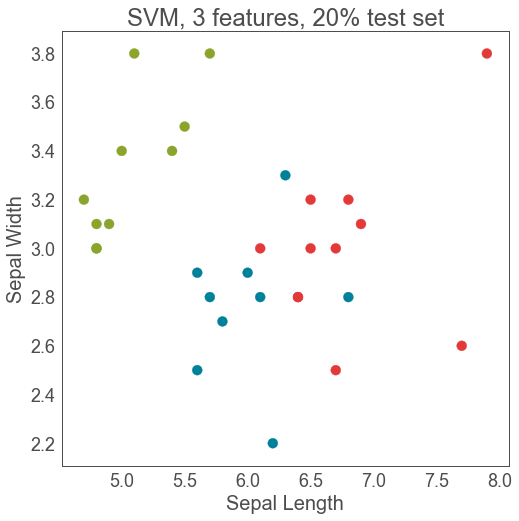

In [636]:
plot_supervised_model('SVM, 3 features, 20% test set', model, X_test, y_test, y_pred)

Cross validation example (add more text: what is cross validation and why use it)

In [637]:
cross_val_score(model, X_sub, y, cv=5)

array([ 0.93333333,  1.        ,  0.9       ,  0.93333333,  0.96666667])

### K-Nearest Neighbors

In [638]:
models = [('2 Neighbors Uniform Weights', KNeighborsClassifier(n_neighbors=2, weights='uniform')),
          ('5 Neighbors Uniform Weights', KNeighborsClassifier(n_neighbors=5, weights='uniform')),
          ('15 Neighbors Uniform Weights', KNeighborsClassifier(n_neighbors=15, weights='uniform'))]

In [639]:
X_sub = X[:, :3]
X_train, X_test, y_train, y_test = train_test_split(X_sub, y, test_size=0.2, random_state=42)

In [640]:
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name + ' Accuracy: ' + str(accuracy_score(y_pred, y_test)))

2 Neighbors Uniform Weights Accuracy: 0.9
5 Neighbors Uniform Weights Accuracy: 0.933333333333
15 Neighbors Uniform Weights Accuracy: 0.966666666667


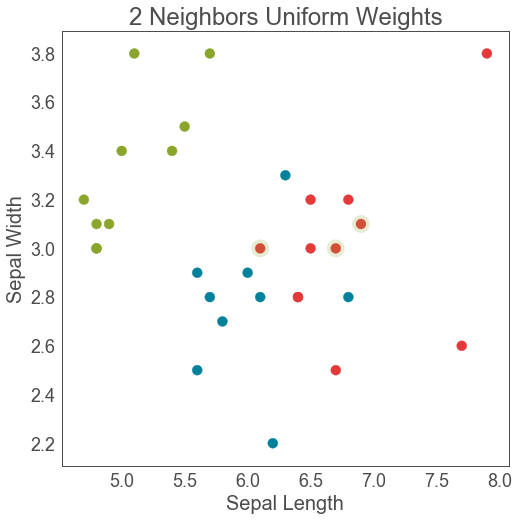

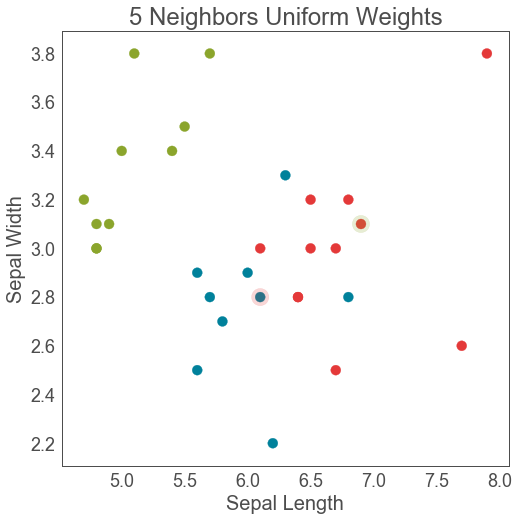

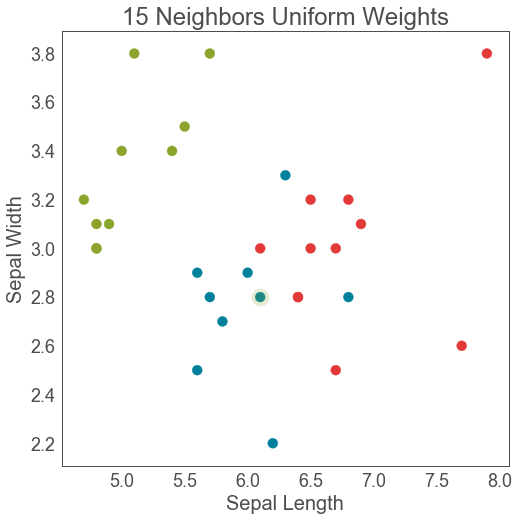

In [641]:
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plot_supervised_model(name, model, X_test, y_test, y_pred)

Train the KNN model with weights that are inversely proportional to distance (link to documentation, or tell them weights='distance')

In [642]:
models = [('2 Neighbors Inverse Distance Weights', KNeighborsClassifier(n_neighbors=2, weights='distance')),
          ('5 Neighbors Inverse Distance Weights', KNeighborsClassifier(n_neighbors=5, weights='distance')),
          ('15 Neighbors Inverse Distance Weights', KNeighborsClassifier(n_neighbors=15, weights='distance'))]

2 Neighbors Inverse Distance Weights Accuracy: 0.933333333333


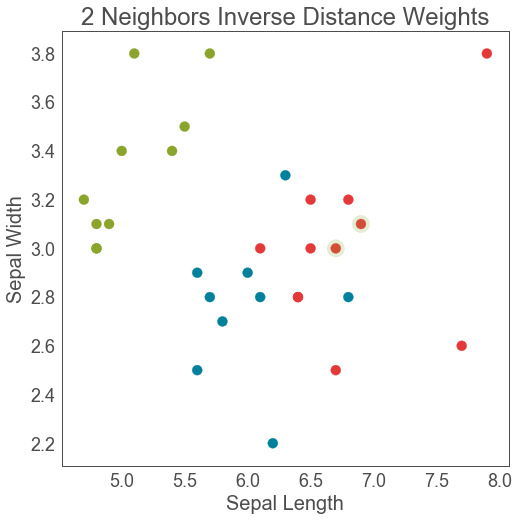

5 Neighbors Inverse Distance Weights Accuracy: 0.933333333333


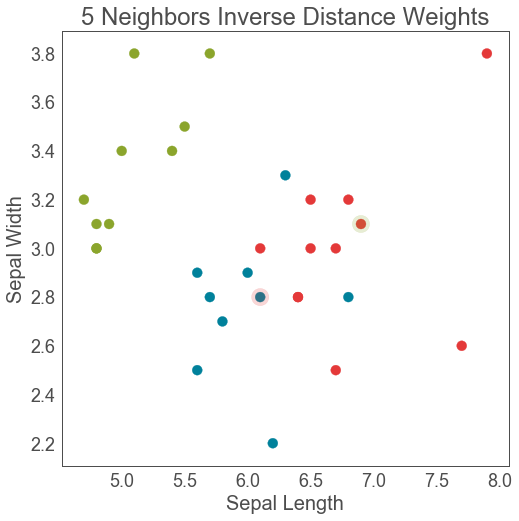

15 Neighbors Inverse Distance Weights Accuracy: 1.0


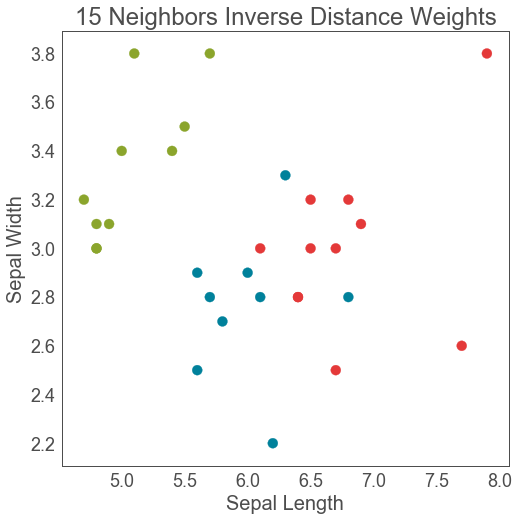

In [643]:
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name + ' Accuracy: ' + str(accuracy_score(y_pred, y_test)))
    plot_supervised_model(name, model, X_test, y_test, y_pred)

### K Means Clustering

In [644]:
models = [('KMeans 2 clusters', KMeans(n_clusters=2)),
          ('KMeans 3 clusters', KMeans(n_clusters=3)), 
          ('KMeans 8 clusters', KMeans(n_clusters=8))]

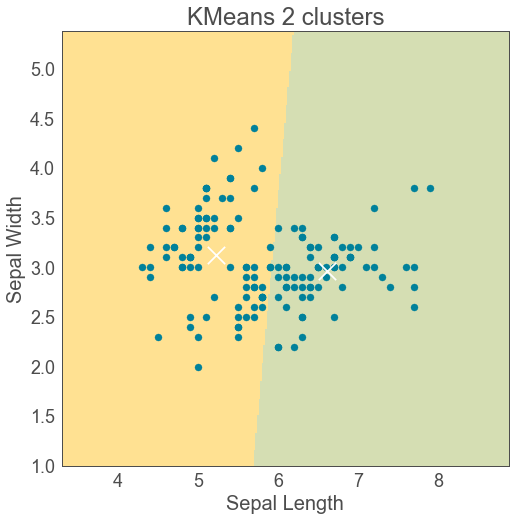

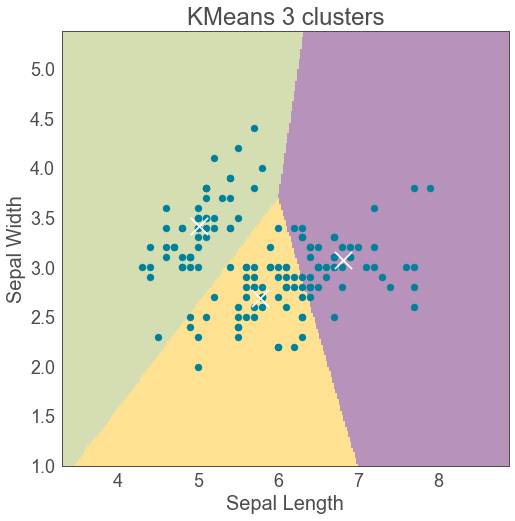

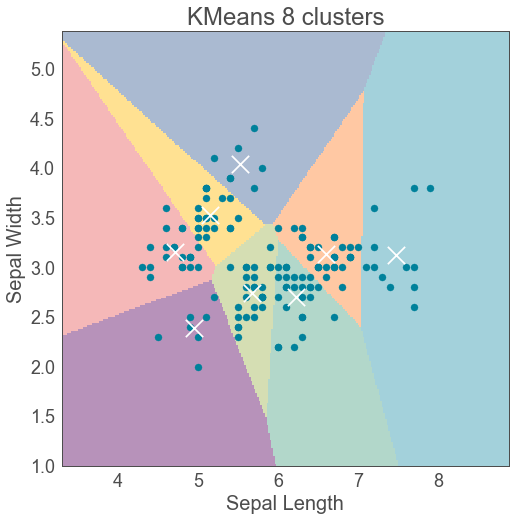

In [645]:
for name, model in models:
    plot_unsupervised_model(name, model, X)

How to pick the number of clusters? E.g. elbow method, or silhouette score

In [646]:
for n_cluster in range(2, 11):
    model = KMeans(n_clusters=n_cluster).fit(X)
    sil_coeff = silhouette_score(X, model.labels_, metric='euclidean')
    print("For {} clusters, the silhouette score is {}".format(n_cluster, sil_coeff))

For 2 clusters, the silhouette score is 0.6808136202713507
For 3 clusters, the silhouette score is 0.5525919445213676
For 4 clusters, the silhouette score is 0.49782569007544936
For 5 clusters, the silhouette score is 0.48851755085386317
For 6 clusters, the silhouette score is 0.3671918108329156
For 7 clusters, the silhouette score is 0.3583580237758512
For 8 clusters, the silhouette score is 0.3608281947253789
For 9 clusters, the silhouette score is 0.3432606022158274
For 10 clusters, the silhouette score is 0.3218797142671104
